<a href="https://colab.research.google.com/github/Adrielguza2005/Simulacion/blob/main/Unidad3/Ejercicio1_distribucion_binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pedidos procesados por jornada:
[11, 13, 17, 17, 11, 13, 17]
Promedio esperado de la distribución: 14.0


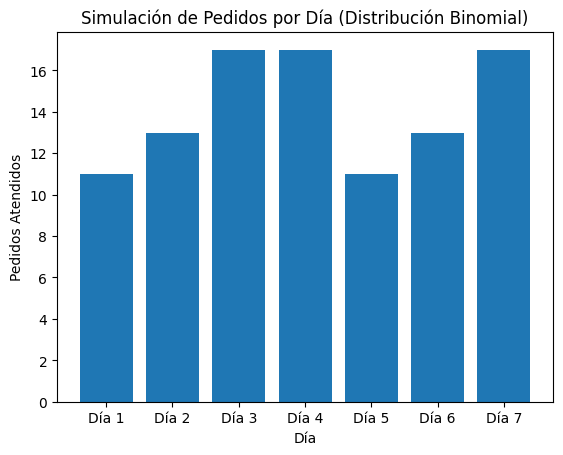

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Definición de parámetros para la simulación
clientes_diarios = 20  # Total de clientes por jornada
probabilidad_disponibilidad = 0.70  # Probabilidad de encontrar el producto
cantidad_dias = 7  # Días de prueba

# Generación de valores aleatorios para la simulación
valores_aleatorios = np.random.uniform(0, 1, cantidad_dias)

# Función que calcula la probabilidad de la distribución binomial
def calcular_probabilidad_binomial(n, k, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Método para generar datos utilizando la transformación inversa
def generar_pedidos(n, p, valor):
    acumulado = 0  # Inicialización de la distribución acumulativa
    cantidad_pedidos = 0
    while True:
        acumulado += calcular_probabilidad_binomial(n, cantidad_pedidos, p)
        if valor <= acumulado:
            return cantidad_pedidos  # Retornamos el número de pedidos
        cantidad_pedidos += 1

# Simulación de los pedidos en cada día
pedidos_por_dia = [generar_pedidos(clientes_diarios, probabilidad_disponibilidad, v) for v in valores_aleatorios]

# Presentación de resultados
print("Pedidos procesados por jornada:")
print(pedidos_por_dia)
print(f"Promedio esperado de la distribución: {clientes_diarios * probabilidad_disponibilidad}")

# Visualización gráfica de la simulación
plt.bar(range(1, cantidad_dias + 1), pedidos_por_dia, tick_label=[f'Día {i+1}' for i in range(cantidad_dias)])
plt.title("Simulación de Pedidos por Día (Distribución Binomial)")
plt.xlabel("Día")
plt.ylabel("Pedidos Atendidos")
plt.show()
